# import os
os.getcwd()

In [1]:
#impoorting Important Libraries and loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics

data = pd.read_csv(r"/home/sunny/Data Science -Python/capstone 2/HealthCareDiabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Descriptive Analysis and EDA 


In [2]:
print( "Shape:",data.shape)
print( "Size",data.size)

print("Columns", data.columns)

Shape: (768, 9)
Size 6912
Columns Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
#unique values in dataset
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [4]:
#dataset Dispersion
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#dataset with null value 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

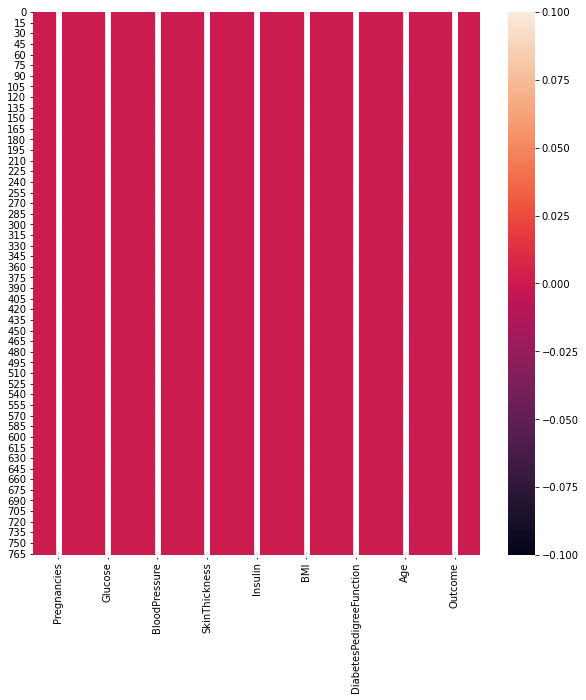

In [6]:
#Heatmap of dataset with null value 
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),annot=True,xticklabels=True)
plt.show()

Great! No null Value in Dataset

In [7]:
#Dataset Info and its datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Seems ,no Categorical Random variable

## Analyzing Relationships between Variables

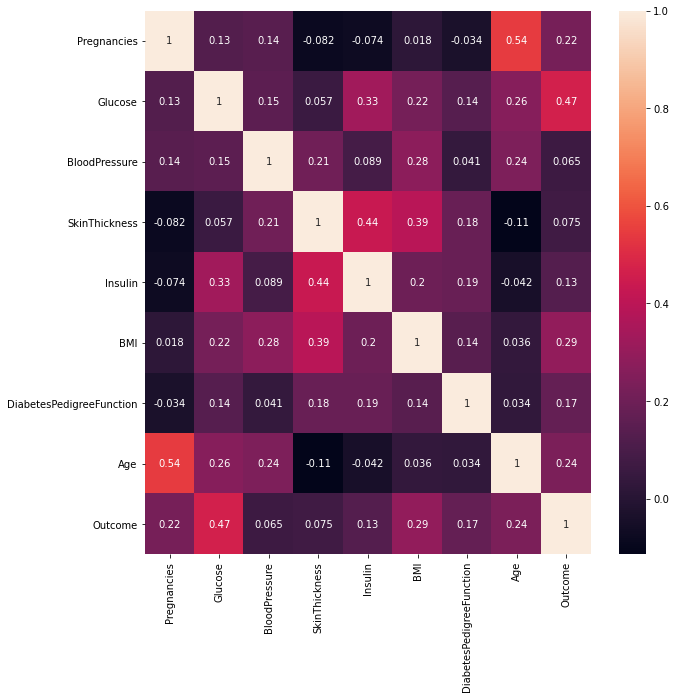

In [8]:
#Heatmap with Correlation of values
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,xticklabels=True,)
plt.show()

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


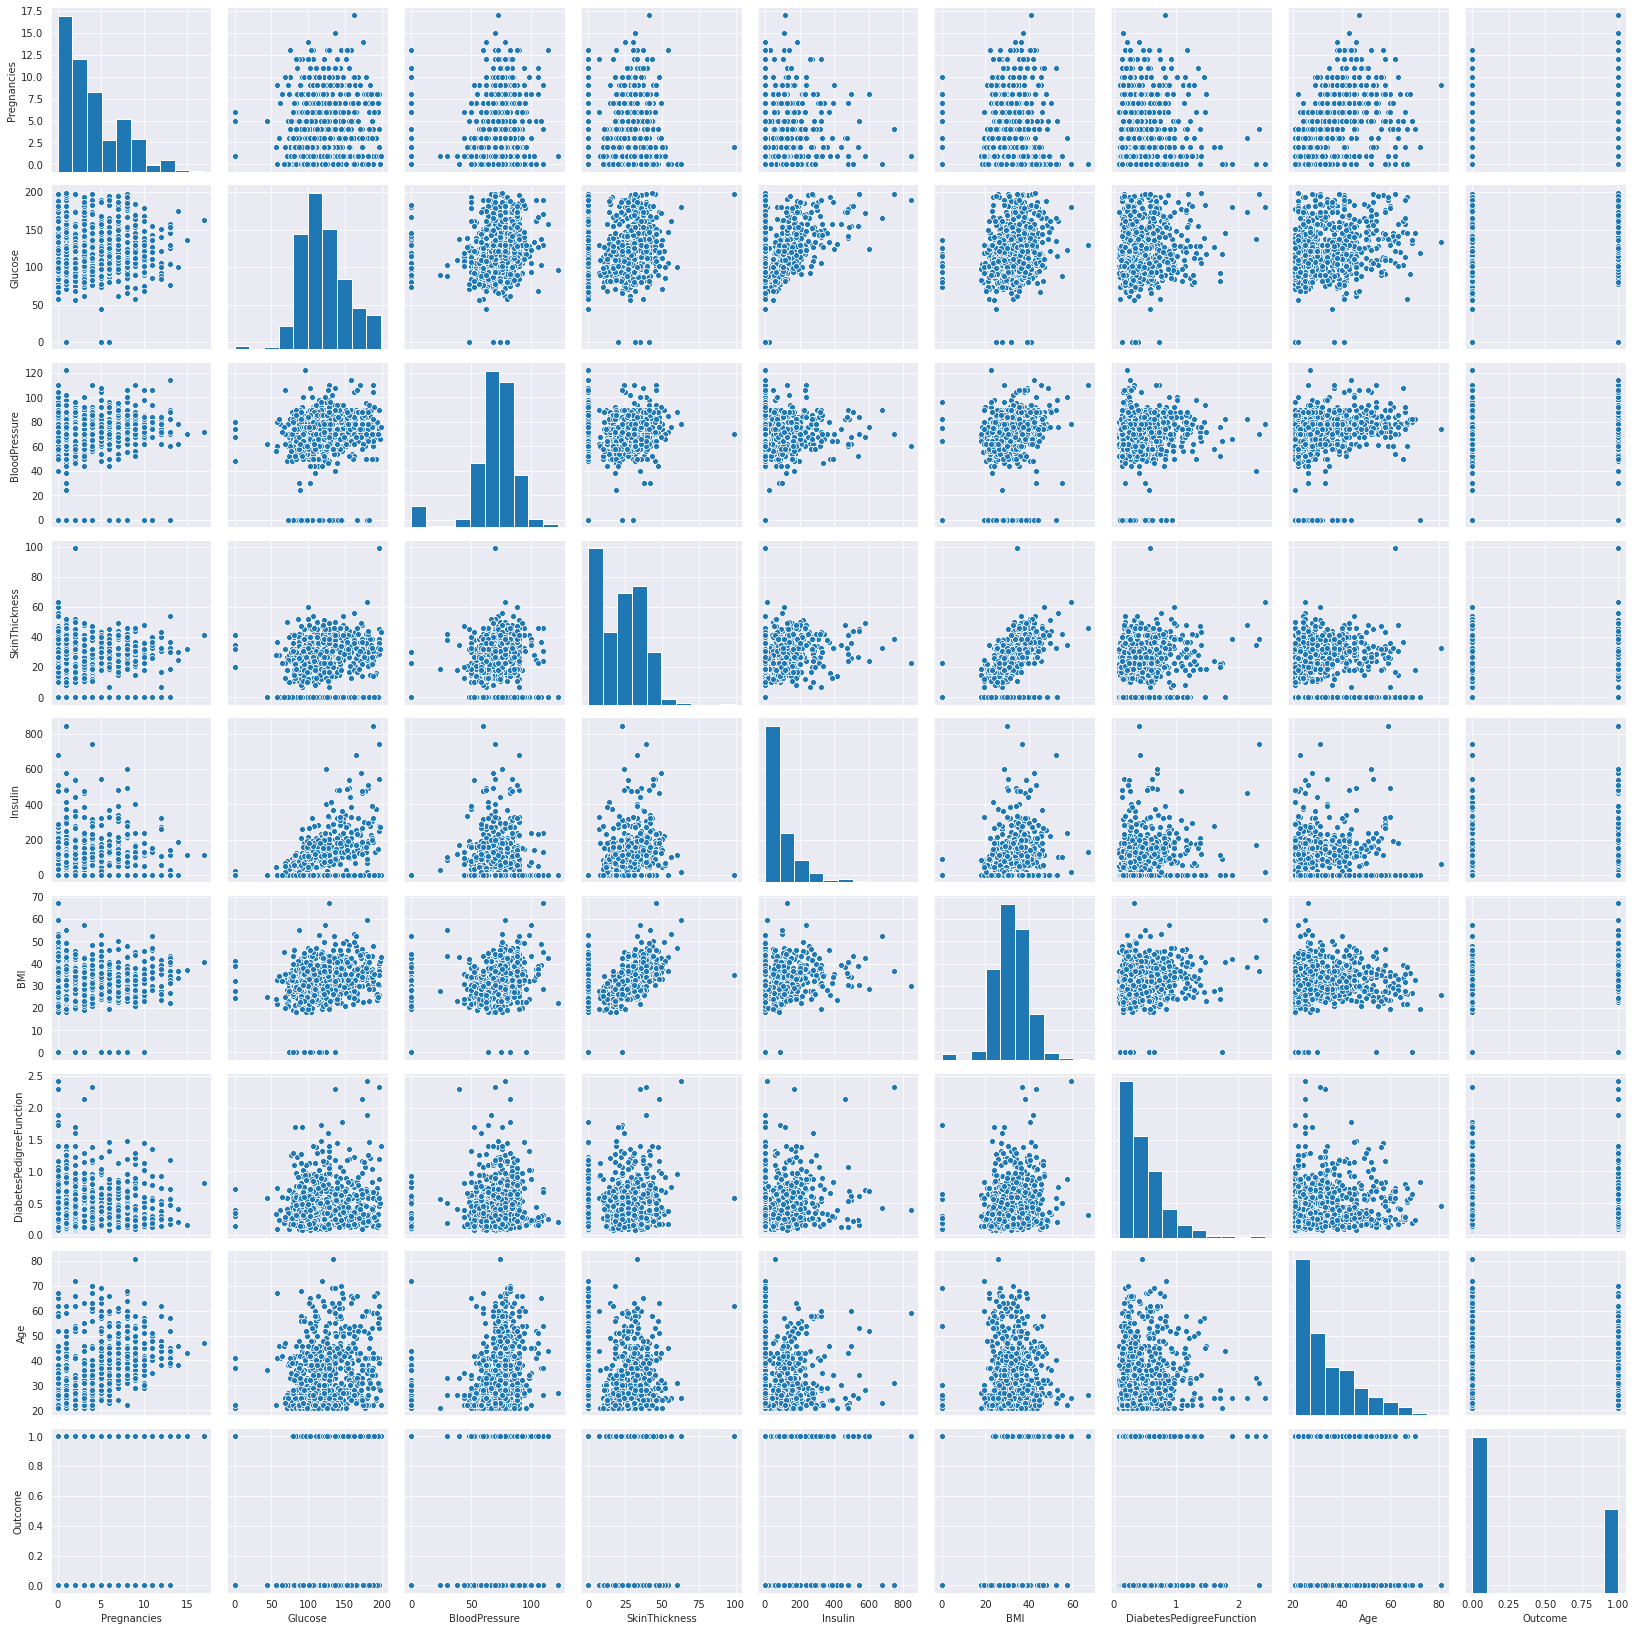

In [10]:
#Using Scatter/pair plot relationship between variables
sns.set_style('darkgrid')
sns.pairplot(data)
plt.show()


In [11]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
for columnName in data.iteritems(): 
    print('Colunm Name : ', columnName) 


Colunm Name :  ('Pregnancies', 0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64)
Colunm Name :  ('Glucose', 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64)
Colunm Name :  ('BloodPressure', 0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64)
Colunm Name :  ('SkinThickness', 0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64)
Colunm Name :  ('Insulin', 0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64)
Colunm Name :  ('BMI', 0      33.6
1      26.6
2   

In [13]:
x=data.columns
for i in x:    
    print(data[i].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64
0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22 

from the above ,outcome has binary values and its Dependent variable 

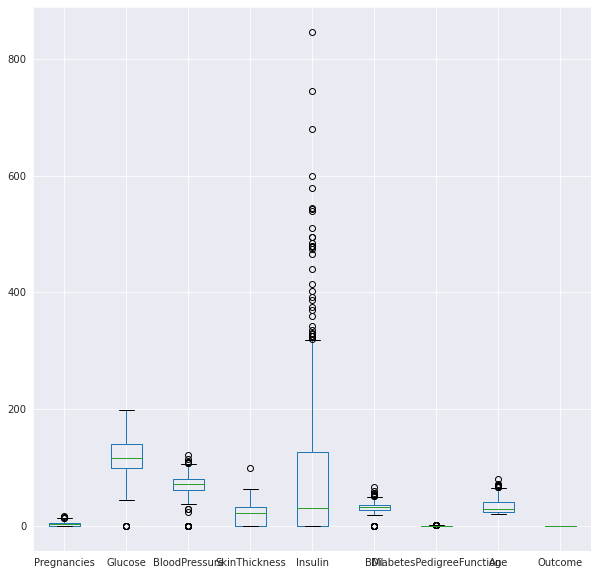

In [14]:
#Checking Outliers
plt.figure(figsize=(10,10))
data.boxplot()
plt.show()

#TASK -1 On the columns Glucose,BloodPressure,SkinThickness, Insulin,BMI have value of zero does not make sense            and thus indicates missing value and replacing it mean of that Column.

In [15]:
#Glucose with zero value
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


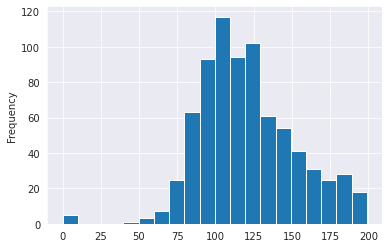

In [16]:
sns.set_style('darkgrid')
data['Glucose'].plot.hist(bins=20)
plt.show()

In [17]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

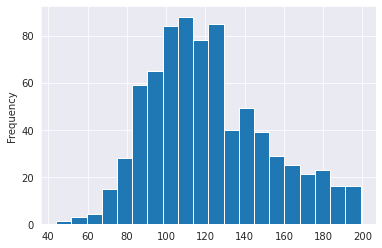

In [18]:
#after replacing zero  value with mean
sns.set_style('darkgrid')
data['Glucose'].plot.hist(bins=20)
plt.show()

In [19]:
#BloodPressure with zero value
data[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


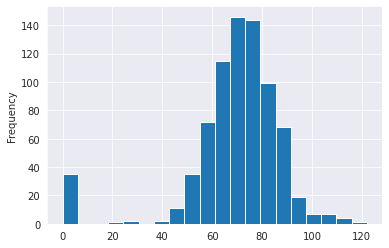

In [20]:
sns.set_style('darkgrid')
data['BloodPressure'].plot.hist(bins=20)

plt.show()

In [21]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())


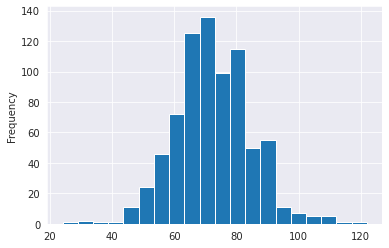

In [22]:
#after replacing zero  value with mean
sns.set_style('darkgrid')
data['BloodPressure'].plot.hist(bins=20)
plt.show()

In [23]:
#SkinThickness with zero value
data[data['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.000000,0,0,23.3,0.672,32,1
5,5,116.0,74.000000,0,0,25.6,0.201,30,0
7,10,115.0,69.105469,0,0,35.3,0.134,29,0
9,8,125.0,96.000000,0,0,0.0,0.232,54,1
10,4,110.0,92.000000,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.000000,0,0,36.3,0.258,52,1
758,1,106.0,76.000000,0,0,37.5,0.197,26,0
759,6,190.0,92.000000,0,0,35.5,0.278,66,1
762,9,89.0,62.000000,0,0,22.5,0.142,33,0


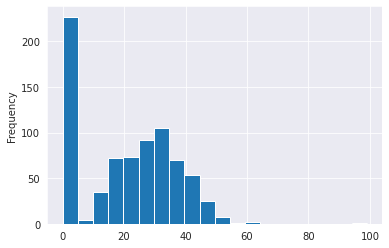

In [24]:
sns.set_style('darkgrid')
data['SkinThickness'].plot.hist(bins=20)
plt.show()

In [25]:
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

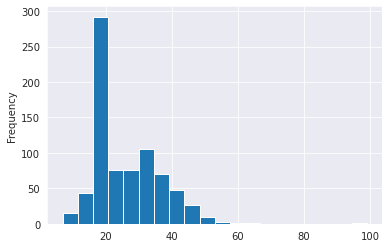

In [26]:
#after replacing zero  value with mean
sns.set_style('darkgrid')
data['SkinThickness'].plot.hist(bins=20)
plt.show()

In [27]:
#Insulin with zero value
data[data['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.000000,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.000000,20.536458,0,23.3,0.672,32,1
5,5,116.0,74.000000,20.536458,0,25.6,0.201,30,0
7,10,115.0,69.105469,20.536458,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.000000,0,44.0,0.403,43,1
762,9,89.0,62.000000,20.536458,0,22.5,0.142,33,0
764,2,122.0,70.000000,27.000000,0,36.8,0.340,27,0
766,1,126.0,60.000000,20.536458,0,30.1,0.349,47,1


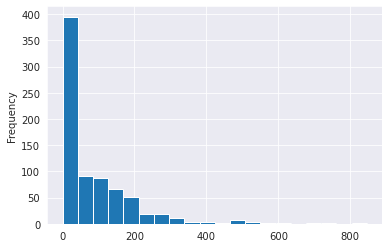

In [28]:
sns.set_style('darkgrid')
data['Insulin'].plot.hist(bins=20)
plt.show()

In [29]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

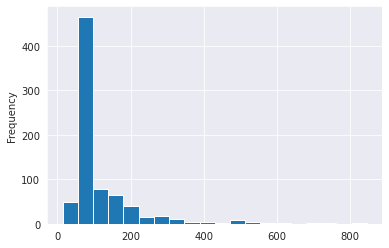

In [30]:
#after replacing zero  value with mean
sns.set_style('darkgrid')
data['Insulin'].plot.hist(bins=20)
plt.show()

In [31]:
#BMI with zero value
data[data['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,20.536458,79.799479,0.0,0.232,54,1
49,7,105.0,69.105469,20.536458,79.799479,0.0,0.305,24,0
60,2,84.0,69.105469,20.536458,79.799479,0.0,0.304,21,0
81,2,74.0,69.105469,20.536458,79.799479,0.0,0.102,22,0
145,0,102.0,75.000000,23.000000,79.799479,0.0,0.572,21,0
371,0,118.0,64.000000,23.000000,89.000000,0.0,1.731,21,0
426,0,94.0,69.105469,20.536458,79.799479,0.0,0.256,25,0
494,3,80.0,69.105469,20.536458,79.799479,0.0,0.174,22,0
522,6,114.0,69.105469,20.536458,79.799479,0.0,0.189,26,0
684,5,136.0,82.000000,20.536458,79.799479,0.0,0.640,69,0


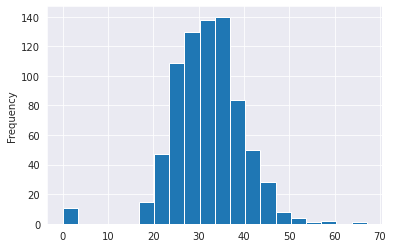

In [32]:
sns.set_style('darkgrid')
data['BMI'].plot.hist(bins=20)
plt.show()

In [33]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

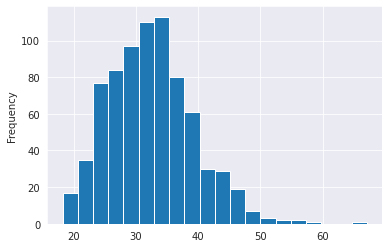

In [34]:
#after replacing zero  value with mean
sns.set_style('darkgrid')
data['BMI'].plot.hist(bins=20)
plt.show()

Text(0, 0.5, 'Count')

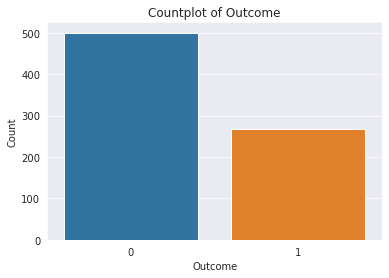

In [35]:
sns.set_style('darkgrid')
sns.countplot(data['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")


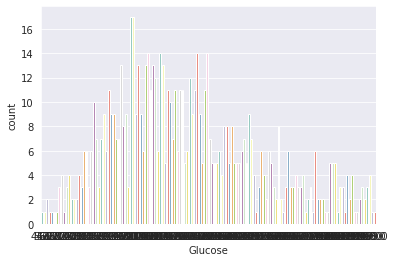

In [36]:
sns.set_style(style="darkgrid")
sns.countplot(x="Glucose", data=data, palette="Set3")
plt.show()

In [37]:
data['Glucose'].value_counts()

100.0    17
99.0     17
125.0    14
106.0    14
111.0    14
         ..
182.0     1
169.0     1
160.0     1
62.0      1
149.0     1
Name: Glucose, Length: 136, dtype: int64

In [38]:
data['BloodPressure'].value_counts()

70.000000     57
74.000000     52
68.000000     45
78.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
58.000000     21
86.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
92.000000      8
75.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
106.000000     3
100.000000     3
110.000000     3
98.000000      3
30.000000      2
108.000000     2
55.000000      2
46.000000      2
104.000000     2
102.000000     1
95.000000      1
61.000000      1
114.000000     1
24.000000      1
38.000000      1
40.000000      1
122.000000     1
Name: BloodPressure, dtype: int64

In [39]:
data['SkinThickness'].value_counts()

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
33.000000     20
18.000000     20
28.000000     20
31.000000     19
19.000000     18
39.000000     18
29.000000     17
40.000000     16
37.000000     16
25.000000     16
22.000000     16
26.000000     16
41.000000     15
35.000000     15
36.000000     14
17.000000     14
15.000000     14
20.000000     13
24.000000     12
42.000000     11
13.000000     11
21.000000     10
34.000000      8
46.000000      8
38.000000      7
12.000000      7
11.000000      6
14.000000      6
43.000000      6
16.000000      6
45.000000      6
10.000000      5
44.000000      5
47.000000      4
48.000000      4
50.000000      3
49.000000      3
7.000000       2
52.000000      2
8.000000       2
54.000000      2
51.000000      1
99.000000      1
60.000000      1
56.000000      1
63.000000      1
Name: SkinThickness, dtype: int64

In [40]:
data['Insulin'].value_counts()

79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
             ... 
15.000000       1
272.000000      1
41.000000       1
25.000000       1
59.000000       1
Name: Insulin, Length: 186, dtype: int64

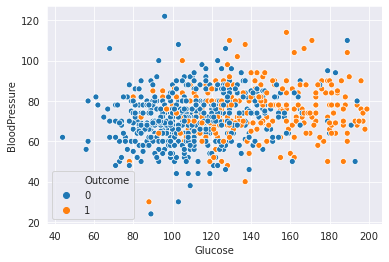

In [41]:
glu =sns.scatterplot(x= "Glucose" ,y= "BloodPressure", hue="Outcome", data=data)

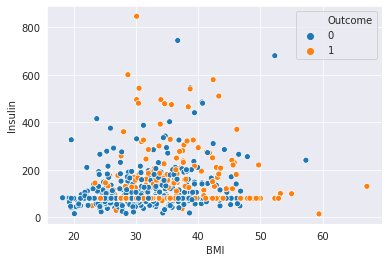

In [42]:
bmi =sns.scatterplot(x= "BMI" ,y= "Insulin",hue="Outcome",data=data);

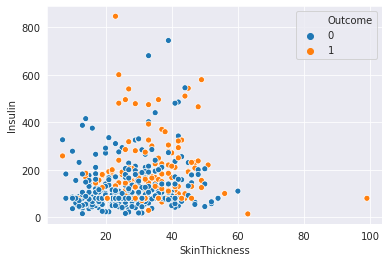

In [43]:
st =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",hue="Outcome",data=data)

## Model Building 

## First Way to detect best Model from Different Model

In [44]:
#Different Model Techniques

#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=7)

#Applying Ensemble Technique-Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=7)

#Applying K-NN
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2)

#Support Vector Classifier
from sklearn.svm import SVC 
sv = SVC(kernel='rbf',gamma='auto')


In [45]:
#Defining Features n Label 
X = data.drop("Outcome",axis=1)
y = data['Outcome']
print(X.shape)
print(y.shape)


(768, 8)
(768,)


In [46]:
#Train test split
from sklearn.model_selection import cross_val_score

In [47]:
#LogisticRegression
cross_val_score(lr,X,y)

array([0.74675325, 0.77922078, 0.74025974, 0.82352941, 0.75816993])

In [48]:
#Applying DecissionTreeClassifier
cross_val_score(dtc,X,y)

array([0.68831169, 0.72077922, 0.65584416, 0.76470588, 0.73856209])

In [49]:
#Applying Ensemble Technique-RandomForestClassifier
cross_val_score(rf,X,y)

array([0.7012987 , 0.71428571, 0.74675325, 0.79084967, 0.73202614])

In [50]:
#Applying K-NN
cross_val_score(knn,X,y)

array([0.73376623, 0.67532468, 0.74675325, 0.79084967, 0.75163399])

In [51]:
#Applying SupportVectorClassifier
cross_val_score(sv,X,y)

array([0.64935065, 0.64935065, 0.64935065, 0.65359477, 0.65359477])

Logistic Regression is best Model ,RFC will be second and with hyper parameter tunning performance will increase.

# Second Option -One by one Model Analysis

In [52]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=50 )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


# LogisticRegression

In [53]:
#Creating Model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#fit the Train data into Model
lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
#Score at Test data 
print(lr.score(X_test,y_test))


0.7552083333333334


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,lr.predict(X))
cm

array([[448,  52],
       [120, 148]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y,lr.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [57]:
y_predict=lr.decision_function(X_test)


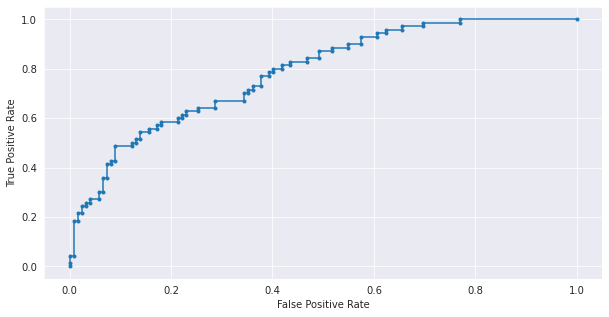

AUC: 0.785


In [58]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc=auc(fpr,tpr)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,marker='.',label='AUC: %.3f' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# calculate AUC
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)

# Applying DecissionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
dtc.score(X_test,y_test)

0.6822916666666666

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,dtc.predict(X))
cm

array([[467,  33],
       [ 28, 240]])

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y,dtc.predict(X)))


              precision    recall  f1-score   support

           0       0.94      0.93      0.94       500
           1       0.88      0.90      0.89       268

    accuracy                           0.92       768
   macro avg       0.91      0.91      0.91       768
weighted avg       0.92      0.92      0.92       768



In [63]:
y_predict=dtc.predict_proba(X_test)
y_predict=y_predict[:, 1]

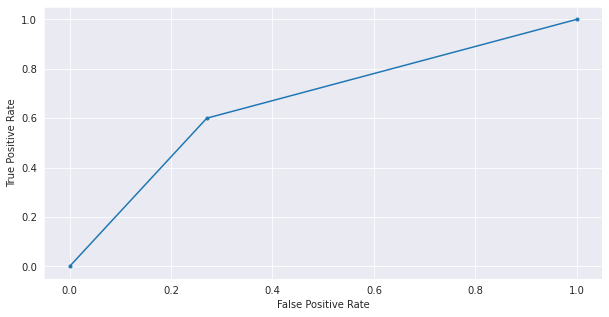

AUC: 0.665


In [64]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc=auc(fpr,tpr)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,marker='.',label='AUC: %.3f' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# calculate AUC
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)

# Applying Ensemble Technique-RandomForestClassifier

In [65]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=11)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

In [66]:
rf.score(X_test,y_test)

0.703125

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y,rf.predict(X)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       500
           1       0.91      0.85      0.88       268

    accuracy                           0.92       768
   macro avg       0.92      0.90      0.91       768
weighted avg       0.92      0.92      0.92       768



In [68]:
y_predict=rf.predict_proba(X_test)
y_predict=y_predict[:, 1]

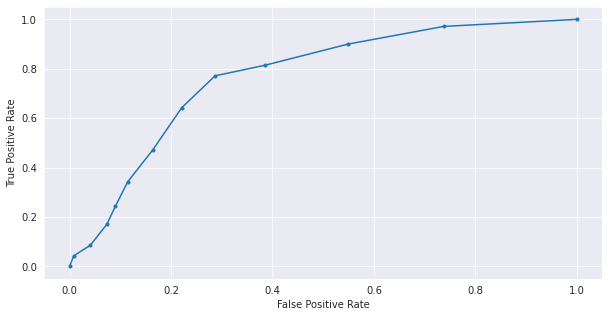

AUC: 0.769


In [69]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc=auc(fpr,tpr)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,marker='.',label='AUC: %.3f' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# calculate AUC
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)

# Support Vector Classifier

In [70]:
from sklearn.svm import SVC 
sv = SVC(kernel='rbf',gamma='auto')
sv.fit(X_train,y_train)

SVC(gamma='auto')

In [71]:
sv.score(X_test,y_test)

0.6354166666666666

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y,sv.predict(X)))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93       500
           1       1.00      0.74      0.85       268

    accuracy                           0.91       768
   macro avg       0.94      0.87      0.89       768
weighted avg       0.92      0.91      0.90       768



In [73]:
y_predict=sv.decision_function(X_test)


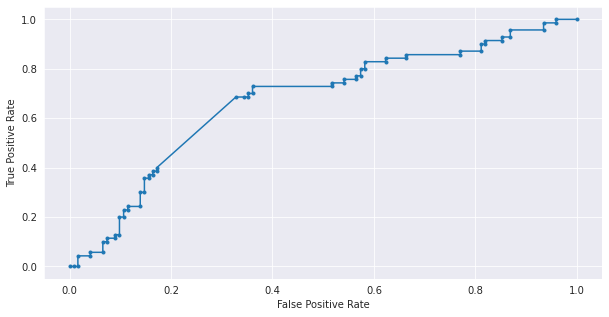

AUC: 0.674


In [74]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc=auc(fpr,tpr)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,marker='.',label='AUC: %.3f' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# calculate AUC
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)

# Applying K-NN

In [75]:

from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [76]:
knn.score(X_test,y_test)

0.6979166666666666

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y,knn.predict(X)))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       500
           1       0.70      0.60      0.64       268

    accuracy                           0.77       768
   macro avg       0.75      0.73      0.74       768
weighted avg       0.76      0.77      0.76       768



In [78]:
y_predict=knn.predict_proba(X_test)
y_predict=y_predict[:, 1]

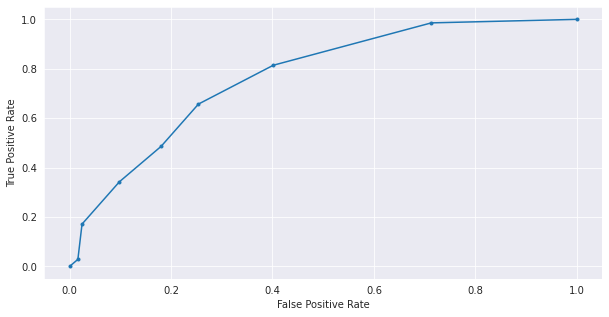

AUC: 0.770


In [79]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc=auc(fpr,tpr)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,marker='.',label='AUC: %.3f' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# calculate AUC
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)

Basis of Precision and Recall values,RandomForestClassifier is best Model.